In [1]:
pip install pandas
pip install numpy  
pip install seaborn  

SyntaxError: invalid syntax (2161580792.py, line 1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as plt

In [119]:
data = pd.read_csv('C:/Users/filip/Firs_task_Zeleznyak/stasic//data.csv')

In [2]:
data = pd.read_csv('C:/Users/filip/PycharmProjects/Firs_task_Zeleznyak/stasic//data.csv')

array([[<AxesSubplot: title={'center': 'receipt_number'}>]], dtype=object)

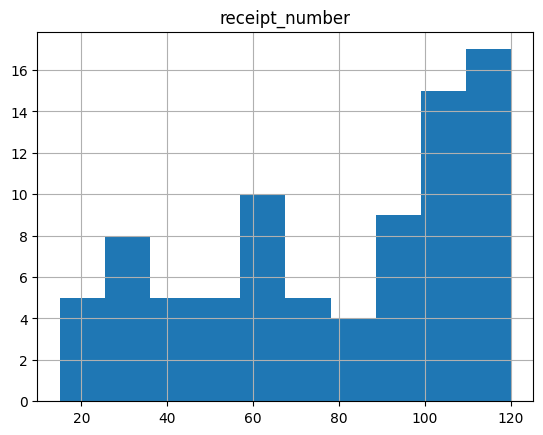

In [3]:
data.hist()

In [4]:
data.head(10)

,receipt_number,product
0,15,Передние тормозные колодки
1,15,Моторное масло
2,15,Масляный фильтр ДВС
3,20,Фильтр салона
4,20,Фильтр салона тонкой очистки
5,30,Свечи зажигания на моделях с бензиновым ДВС
6,30,Передние тормозные колодки
7,30,Задние тормозные колодки
8,30,Моторное масло
9,30,Воздушный фильтр ДВС


In [5]:
unique_receipts = data.receipt_number.unique()
print(len(unique_receipts))
unique_receipts

15


array([ 15,  20,  30,  40,  45,  50,  55,  60,  70,  75,  80,  90, 100,
       110, 120], dtype=int64)

In [6]:
unique_products = data['product'].unique()
print(len(unique_products))
unique_products

28


array(['Передние тормозные колодки', 'Моторное масло',
       'Масляный фильтр ДВС', 'Фильтр салона',
       'Фильтр салона тонкой очистки',
       'Свечи зажигания на моделях с бензиновым ДВС',
       'Задние тормозные колодки', 'Воздушный фильтр ДВС',
       'Топливный фильтр тонкой очистки', 'Щетки стеклоочистителя',
       'Масло в коробке передач', 'Жидкость ГУР',
       'Масляный фильтр коробки передач', 'Тормозная жидкость',
       'Приводной ремень', 'Основной аккумулятор', 'Рычаги подвески',
       'Шрусы или их составные части',
       'Свечи накаливания на моделях с дизельным ДВС"',
       'Стойки (тяги) стабилизатора', 'Тормозные диски',
       'Ступичный подшипник на передней и задней паре колёс',
       'Сальники ступицы на передней и задней паре колёс',
       'Зимний и летний комплект шин', 'Топливный насос',
       'Термостат системы охлаждения ДВС',
       'Термостат AGR/EGR на моделях с охлаждением рециркулируемых ОГ',
       'Смазка в шрусах, пыльники и хомуты'], dt

In [7]:
data_np = data.to_numpy()
data_np[:5]

array([[15, 'Передние тормозные колодки'],
       [15, 'Моторное масло'],
       [15, 'Масляный фильтр ДВС'],
       [20, 'Фильтр салона'],
       [20, 'Фильтр салона тонкой очистки']], dtype=object)

In [8]:
group_products_receipts = []
for i in unique_receipts:
    micro_data = []
    for j in data_np:
        if j[0] == i:
            micro_data.append(j[1])
    group_products_receipts.append(micro_data)

In [9]:
dataframe = pd.DataFrame({'receipt' : unique_receipts,
                  
                          'product' : group_products_receipts}, 
                                columns=['receipt','product'])
dataframe

,receipt,product
0,15,"[Передние тормозные колодки, Моторное масло, М..."
1,20,"[Фильтр салона, Фильтр салона тонкой очистки]"
2,30,"[Свечи зажигания на моделях с бензиновым ДВС, ..."
3,40,"[Передние тормозные колодки, Фильтр салона, Фи..."
4,45,"[Моторное масло, Масляный фильтр ДВС]"
5,50,"[Передние тормозные колодки, Масло в коробке п..."
6,55,[Тормозная жидкость]
7,60,"[Свечи зажигания на моделях с бензиновым ДВС, ..."
8,70,"[Приводной ремень, Передние тормозные колодки,..."
9,75,"[Моторное масло, Масляный фильтр ДВС]"


In [10]:
procent_product_in_receipt = []

In [12]:
len_dataframe = len(dataframe)
len_dataframe

15

In [13]:
count_product_procent_ = []
for x in unique_products:
    count_product = 0
    for i in group_products_receipts:
        switch = False
        for j in i:
            if j == x:
                switch = True
        if switch:
            count_product += 1
    count_product_procent_.append(count_product)
for i in range(len(count_product_procent_)):
    count_product_procent_[i] = round(count_product_procent_[i]/len_dataframe, 2)
count_product_procent_

[0.73,
 0.6,
 0.6,
 0.4,
 0.4,
 0.27,
 0.27,
 0.27,
 0.27,
 0.27,
 0.13,
 0.13,
 0.13,
 0.13,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07]

In [14]:
count_product_procent = []
for i in range(len(count_product_procent_)):
    count_product_procent.append([unique_products[i], count_product_procent_[i]])
count_product_procent

[['Передние тормозные колодки', 0.73],
 ['Моторное масло', 0.6],
 ['Масляный фильтр ДВС', 0.6],
 ['Фильтр салона', 0.4],
 ['Фильтр салона тонкой очистки', 0.4],
 ['Свечи зажигания на моделях с бензиновым ДВС', 0.27],
 ['Задние тормозные колодки', 0.27],
 ['Воздушный фильтр ДВС', 0.27],
 ['Топливный фильтр тонкой очистки', 0.27],
 ['Щетки стеклоочистителя', 0.27],
 ['Масло в коробке передач', 0.13],
 ['Жидкость ГУР', 0.13],
 ['Масляный фильтр коробки передач', 0.13],
 ['Тормозная жидкость', 0.13],
 ['Приводной ремень', 0.07],
 ['Основной аккумулятор', 0.07],
 ['Рычаги подвески', 0.07],
 ['Шрусы или их составные части', 0.07],
 ['Свечи накаливания на моделях с дизельным ДВС"', 0.07],
 ['Стойки (тяги) стабилизатора', 0.07],
 ['Тормозные диски', 0.07],
 ['Ступичный подшипник на передней и задней паре колёс', 0.07],
 ['Сальники ступицы на передней и задней паре колёс', 0.07],
 ['Зимний и летний комплект шин', 0.07],
 ['Топливный насос', 0.07],
 ['Термостат системы охлаждения ДВС', 0.07],
 [

In [15]:
mass_two_product = []
for i in range(len(count_product_procent)-1):
    for j in range(i + 1, len(count_product_procent)):
        mass_two_product.append([count_product_procent[i][0], count_product_procent[j][0]])
mass_two_product

[['Передние тормозные колодки', 'Моторное масло'],
 ['Передние тормозные колодки', 'Масляный фильтр ДВС'],
 ['Передние тормозные колодки', 'Фильтр салона'],
 ['Передние тормозные колодки', 'Фильтр салона тонкой очистки'],
 ['Передние тормозные колодки', 'Свечи зажигания на моделях с бензиновым ДВС'],
 ['Передние тормозные колодки', 'Задние тормозные колодки'],
 ['Передние тормозные колодки', 'Воздушный фильтр ДВС'],
 ['Передние тормозные колодки', 'Топливный фильтр тонкой очистки'],
 ['Передние тормозные колодки', 'Щетки стеклоочистителя'],
 ['Передние тормозные колодки', 'Масло в коробке передач'],
 ['Передние тормозные колодки', 'Жидкость ГУР'],
 ['Передние тормозные колодки', 'Масляный фильтр коробки передач'],
 ['Передние тормозные колодки', 'Тормозная жидкость'],
 ['Передние тормозные колодки', 'Приводной ремень'],
 ['Передние тормозные колодки', 'Основной аккумулятор'],
 ['Передние тормозные колодки', 'Рычаги подвески'],
 ['Передние тормозные колодки', 'Шрусы или их составные час

In [16]:
suported_mass_two_product_ = []
for x in mass_two_product:
    count = 0
    for i in group_products_receipts:
        if x[0] in i and x[1] in i:
            count += 1
    suported_mass_two_product_.append(count)
for i in range(len(suported_mass_two_product_)):
    suported_mass_two_product_[i] = round(suported_mass_two_product_[i] * 100 / len_dataframe, 2)
suported_mass_two_product = []
for i in range(len(mass_two_product)):
    suported_mass_two_product.append([mass_two_product[i][0], mass_two_product[i][1], suported_mass_two_product_[i]])
for i in range(len(suported_mass_two_product)):
    print(f'{suported_mass_two_product[i][0]}, {suported_mass_two_product[i][1]} = {suported_mass_two_product[i][2]}%')

Передние тормозные колодки, Моторное масло = 46.67%
Передние тормозные колодки, Масляный фильтр ДВС = 46.67%
Передние тормозные колодки, Фильтр салона = 33.33%
Передние тормозные колодки, Фильтр салона тонкой очистки = 33.33%
Передние тормозные колодки, Свечи зажигания на моделях с бензиновым ДВС = 26.67%
Передние тормозные колодки, Задние тормозные колодки = 26.67%
Передние тормозные колодки, Воздушный фильтр ДВС = 26.67%
Передние тормозные колодки, Топливный фильтр тонкой очистки = 26.67%
Передние тормозные колодки, Щетки стеклоочистителя = 26.67%
Передние тормозные колодки, Масло в коробке передач = 13.33%
Передние тормозные колодки, Жидкость ГУР = 13.33%
Передние тормозные колодки, Масляный фильтр коробки передач = 13.33%
Передние тормозные колодки, Тормозная жидкость = 6.67%
Передние тормозные колодки, Приводной ремень = 6.67%
Передние тормозные колодки, Основной аккумулятор = 6.67%
Передние тормозные колодки, Рычаги подвески = 6.67%
Передние тормозные колодки, Шрусы или их состав

In [17]:
reliability_mass_two_product_ = []
reliability_mass_two_product__ = []
for x in mass_two_product:
    count = 0
    for i in group_products_receipts:
        if x[0] in i and x[1] in i:
            count += 1
    reliability_mass_two_product_.append(count)
for x in mass_two_product:
    count_firs = 0
    for i in group_products_receipts:
        if x[0] in i:
            count_firs += 1
    reliability_mass_two_product__.append(count_firs)
for i in range(len(suported_mass_two_product)):
    reliability_mass_two_product_[i] = round(reliability_mass_two_product_[i] * 100 / reliability_mass_two_product__[i], 2)
reliability_mass_two_product = []
for i in range(len(mass_two_product)):
    reliability_mass_two_product.append([mass_two_product[i][0], mass_two_product[i][1], reliability_mass_two_product_[i]])
for i in range(len(reliability_mass_two_product)):
    print(f'{reliability_mass_two_product[i][0]}, {reliability_mass_two_product[i][1]} = {reliability_mass_two_product[i][2]}')

Передние тормозные колодки, Моторное масло = 63.64
Передние тормозные колодки, Масляный фильтр ДВС = 63.64
Передние тормозные колодки, Фильтр салона = 45.45
Передние тормозные колодки, Фильтр салона тонкой очистки = 45.45
Передние тормозные колодки, Свечи зажигания на моделях с бензиновым ДВС = 36.36
Передние тормозные колодки, Задние тормозные колодки = 36.36
Передние тормозные колодки, Воздушный фильтр ДВС = 36.36
Передние тормозные колодки, Топливный фильтр тонкой очистки = 36.36
Передние тормозные колодки, Щетки стеклоочистителя = 36.36
Передние тормозные колодки, Масло в коробке передач = 18.18
Передние тормозные колодки, Жидкость ГУР = 18.18
Передние тормозные колодки, Масляный фильтр коробки передач = 18.18
Передние тормозные колодки, Тормозная жидкость = 9.09
Передние тормозные колодки, Приводной ремень = 9.09
Передние тормозные колодки, Основной аккумулятор = 9.09
Передние тормозные колодки, Рычаги подвески = 9.09
Передние тормозные колодки, Шрусы или их составные части = 9.09

In [18]:
lift_mass_two_product_ = []
lift_mass_two_product__ = []

for i in range(len(reliability_mass_two_product)):
    lift_mass_two_product_.append(reliability_mass_two_product[i][2])

for x in mass_two_product:
    count_second = 0
    for i in group_products_receipts:
        if x[1] in i:
            count_second += 1
    lift_mass_two_product__.append(count_second)

for i in range(len(lift_mass_two_product_)):
    lift_mass_two_product__[i] = round(lift_mass_two_product__[i] * 100 / len_dataframe)


lift_mass_two_product = []
for i in range(len(mass_two_product)):
    lift_mass_two_product.append([mass_two_product[i][0], mass_two_product[i][1], round(lift_mass_two_product_[i]/lift_mass_two_product__[i], 2)])


for i in range(len(lift_mass_two_product)):
    print(f'{lift_mass_two_product[i][0]}, {lift_mass_two_product[i][1]} = {lift_mass_two_product[i][2]}')

Передние тормозные колодки, Моторное масло = 1.06
Передние тормозные колодки, Масляный фильтр ДВС = 1.06
Передние тормозные колодки, Фильтр салона = 1.14
Передние тормозные колодки, Фильтр салона тонкой очистки = 1.14
Передние тормозные колодки, Свечи зажигания на моделях с бензиновым ДВС = 1.35
Передние тормозные колодки, Задние тормозные колодки = 1.35
Передние тормозные колодки, Воздушный фильтр ДВС = 1.35
Передние тормозные колодки, Топливный фильтр тонкой очистки = 1.35
Передние тормозные колодки, Щетки стеклоочистителя = 1.35
Передние тормозные колодки, Масло в коробке передач = 1.4
Передние тормозные колодки, Жидкость ГУР = 1.4
Передние тормозные колодки, Масляный фильтр коробки передач = 1.4
Передние тормозные колодки, Тормозная жидкость = 0.7
Передние тормозные колодки, Приводной ремень = 1.3
Передние тормозные колодки, Основной аккумулятор = 1.3
Передние тормозные колодки, Рычаги подвески = 1.3
Передние тормозные колодки, Шрусы или их составные части = 1.3
Передние тормозные 

In [19]:
Dataframe_ = []
for i in range(len(mass_two_product)):
    mass = []
    mass.append(suported_mass_two_product[i][-1])
    mass.append(reliability_mass_two_product[i][-1])
    mass.append(lift_mass_two_product[i][-1])
    Dataframe_.append(mass)
index_ = []
for i in range(len(mass_two_product)):
    string = f'{mass_two_product[i][0]}, {mass_two_product[i][1]}'
    index_.append(string)

In [20]:
Dataframe = pd.DataFrame(Dataframe_, columns =['Suported', 'Reliability', 'Lift'], index=index_) 
Dataframe = (Dataframe.loc[Dataframe.Suported < 89]) 
Dataframe = (Dataframe.loc[20 < Dataframe.Suported]) 
Dataframe = (Dataframe.loc[30 < Dataframe.Reliability]) 
Dataframe = (Dataframe.loc[Dataframe.Reliability < 70])
Dataframe


,Suported,Reliability,Lift
"Передние тормозные колодки, Моторное масло",46.67,63.64,1.06
"Передние тормозные колодки, Масляный фильтр ДВС",46.67,63.64,1.06
"Передние тормозные колодки, Фильтр салона",33.33,45.45,1.14
"Передние тормозные колодки, Фильтр салона тонкой очистки",33.33,45.45,1.14
"Передние тормозные колодки, Свечи зажигания на моделях с бензиновым ДВС",26.67,36.36,1.35
"Передние тормозные колодки, Задние тормозные колодки",26.67,36.36,1.35
"Передние тормозные колодки, Воздушный фильтр ДВС",26.67,36.36,1.35
"Передние тормозные колодки, Топливный фильтр тонкой очистки",26.67,36.36,1.35
"Передние тормозные колодки, Щетки стеклоочистителя",26.67,36.36,1.35
"Моторное масло, Свечи зажигания на моделях с бензиновым ДВС",26.67,44.44,1.65


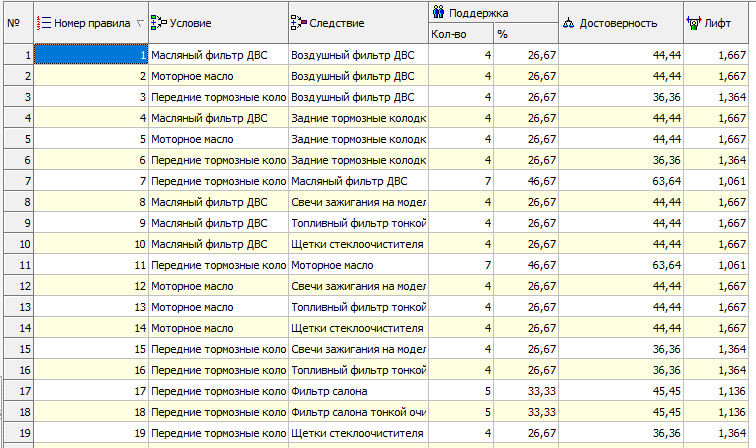

<AxesSubplot: >

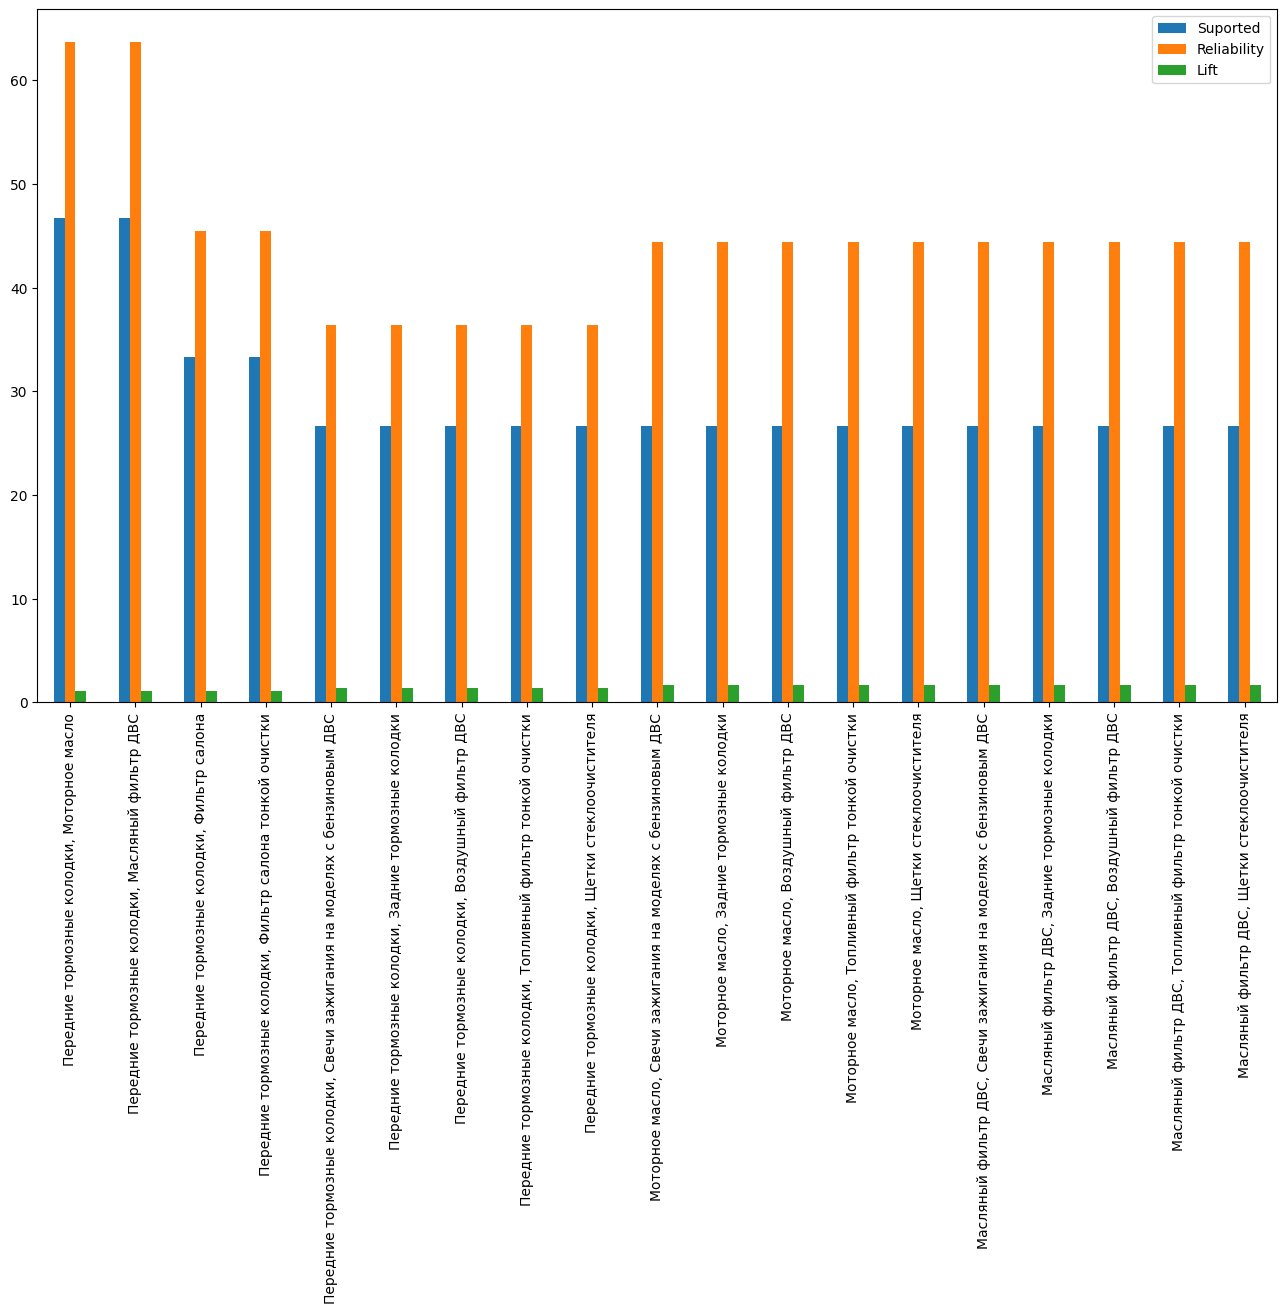

In [21]:
Dataframe.plot.bar(figsize=(16,9))

In [31]:
Dataframe_whis_three = []
for i in range(len(mass_two_product)):
    mass = []
    mass.append([mass_two_product[i][0], mass_two_product[i][1]])
    mass.append(suported_mass_two_product[i][-1])
    mass.append(reliability_mass_two_product[i][-1])
    mass.append(lift_mass_two_product[i][-1])
    Dataframe_whis_three.append(mass)
Dataframe_whis_three = pd.DataFrame(Dataframe_whis_three, columns =['Name product', 'Suported', 'Reliability', 'Lift'],) 
Dataframe_whis_three = (Dataframe_whis_three.loc[Dataframe_whis_three.Suported < 89]) 
Dataframe_whis_three = (Dataframe_whis_three.loc[20 < Dataframe_whis_three.Suported]) 
Dataframe_whis_three = (Dataframe_whis_three.loc[30 < Dataframe_whis_three.Reliability]) 
Dataframe_whis_three = (Dataframe_whis_three.loc[Dataframe_whis_three.Reliability < 70])
Dataframe_whis_three = Dataframe_whis_three['Name product'].to_list()
Dataframe_whis_three

[['Передние тормозные колодки', 'Моторное масло'],
 ['Передние тормозные колодки', 'Масляный фильтр ДВС'],
 ['Передние тормозные колодки', 'Фильтр салона'],
 ['Передние тормозные колодки', 'Фильтр салона тонкой очистки'],
 ['Передние тормозные колодки', 'Свечи зажигания на моделях с бензиновым ДВС'],
 ['Передние тормозные колодки', 'Задние тормозные колодки'],
 ['Передние тормозные колодки', 'Воздушный фильтр ДВС'],
 ['Передние тормозные колодки', 'Топливный фильтр тонкой очистки'],
 ['Передние тормозные колодки', 'Щетки стеклоочистителя'],
 ['Моторное масло', 'Свечи зажигания на моделях с бензиновым ДВС'],
 ['Моторное масло', 'Задние тормозные колодки'],
 ['Моторное масло', 'Воздушный фильтр ДВС'],
 ['Моторное масло', 'Топливный фильтр тонкой очистки'],
 ['Моторное масло', 'Щетки стеклоочистителя'],
 ['Масляный фильтр ДВС', 'Свечи зажигания на моделях с бензиновым ДВС'],
 ['Масляный фильтр ДВС', 'Задние тормозные колодки'],
 ['Масляный фильтр ДВС', 'Воздушный фильтр ДВС'],
 ['Масляный

In [32]:
# Mass_whis_three = []
# for number_set in range(len(Dataframe_whis_three)):
#     mass = []
#     mass.append(Dataframe_whis_three[number_set][0])
#     mass.append(Dataframe_whis_three[number_set][1])
#     for unique in range(len(unique_products)):
#         if unique_products[unique]
Mass_whis_three = []
for lots in Dataframe_whis_three:
    for unique in unique_products:
        mass = []
        if unique not in lots:
            mass.append(lots[0])
            mass.append(lots[1])
            mass.append(unique)
            Mass_whis_three.append(mass)

mass_count_three = [0]*len(Mass_whis_three)
dataframe_ = dataframe['product'].to_list()
for i in Mass_whis_three:
    print(i)


['Передние тормозные колодки', 'Моторное масло', 'Масляный фильтр ДВС']
['Передние тормозные колодки', 'Моторное масло', 'Фильтр салона']
['Передние тормозные колодки', 'Моторное масло', 'Фильтр салона тонкой очистки']
['Передние тормозные колодки', 'Моторное масло', 'Свечи зажигания на моделях с бензиновым ДВС']
['Передние тормозные колодки', 'Моторное масло', 'Задние тормозные колодки']
['Передние тормозные колодки', 'Моторное масло', 'Воздушный фильтр ДВС']
['Передние тормозные колодки', 'Моторное масло', 'Топливный фильтр тонкой очистки']
['Передние тормозные колодки', 'Моторное масло', 'Щетки стеклоочистителя']
['Передние тормозные колодки', 'Моторное масло', 'Масло в коробке передач']
['Передние тормозные колодки', 'Моторное масло', 'Жидкость ГУР']
['Передние тормозные колодки', 'Моторное масло', 'Масляный фильтр коробки передач']
['Передние тормозные колодки', 'Моторное масло', 'Тормозная жидкость']
['Передние тормозные колодки', 'Моторное масло', 'Приводной ремень']
['Передние 

In [33]:
for mass_new_product in range(len(Mass_whis_three)):
    for products in dataframe_:
         if set(Mass_whis_three[mass_new_product]).issubset(products):
            mass_count_three[mass_new_product] += 1
for i in range(len(Mass_whis_three)):
        Mass_whis_three[i].append(round(mass_count_three[i] * 100 /len(unique_receipts),2))
        print(Mass_whis_three[i])

        

['Передние тормозные колодки', 'Моторное масло', 'Масляный фильтр ДВС', 46.67]
['Передние тормозные колодки', 'Моторное масло', 'Фильтр салона', 20.0]
['Передние тормозные колодки', 'Моторное масло', 'Фильтр салона тонкой очистки', 20.0]
['Передние тормозные колодки', 'Моторное масло', 'Свечи зажигания на моделях с бензиновым ДВС', 26.67]
['Передние тормозные колодки', 'Моторное масло', 'Задние тормозные колодки', 26.67]
['Передние тормозные колодки', 'Моторное масло', 'Воздушный фильтр ДВС', 26.67]
['Передние тормозные колодки', 'Моторное масло', 'Топливный фильтр тонкой очистки', 26.67]
['Передние тормозные колодки', 'Моторное масло', 'Щетки стеклоочистителя', 26.67]
['Передние тормозные колодки', 'Моторное масло', 'Масло в коробке передач', 6.67]
['Передние тормозные колодки', 'Моторное масло', 'Жидкость ГУР', 6.67]
['Передние тормозные колодки', 'Моторное масло', 'Масляный фильтр коробки передач', 6.67]
['Передние тормозные колодки', 'Моторное масло', 'Тормозная жидкость', 6.67]
['

In [34]:
Mass_three = []
for i in range(len(Mass_whis_three)):
    if Mass_whis_three[i][-1] >= 30: # ТУТ ПРОЦЕНТ МЕНЯТЬ!!!!
        Mass_three.append(Mass_whis_three[i])
Mass_three

[['Передние тормозные колодки',
  'Моторное масло',
  'Масляный фильтр ДВС',
  46.67],
 ['Передние тормозные колодки',
  'Масляный фильтр ДВС',
  'Моторное масло',
  46.67],
 ['Передние тормозные колодки',
  'Фильтр салона',
  'Фильтр салона тонкой очистки',
  33.33],
 ['Передние тормозные колодки',
  'Фильтр салона тонкой очистки',
  'Фильтр салона',
  33.33]]

In [35]:
Mass_three
for i in range(len(Mass_three)):
    count_one = 0
    count_two = 0
    for j in range(len(dataframe_)):
        if set([Mass_three[i][0], Mass_three[i][1]]).issubset(dataframe_[j]):
            count_one += 1
    for j in range(len(dataframe_)):
        if set([Mass_three[i][0], Mass_three[i][1], Mass_three[i][2]]).issubset(dataframe_[j]):
            count_two += 1
    Mass_three[i].append(round(count_two * 100 /count_one, 2))
Mass_three

[['Передние тормозные колодки',
  'Моторное масло',
  'Масляный фильтр ДВС',
  46.67,
  100.0],
 ['Передние тормозные колодки',
  'Масляный фильтр ДВС',
  'Моторное масло',
  46.67,
  100.0],
 ['Передние тормозные колодки',
  'Фильтр салона',
  'Фильтр салона тонкой очистки',
  33.33,
  100.0],
 ['Передние тормозные колодки',
  'Фильтр салона тонкой очистки',
  'Фильтр салона',
  33.33,
  100.0]]

In [36]:
for i in range(len(Mass_three)):
    count_one = 0
    for j in range(len(dataframe_)):
        if set([Mass_three[i][2]]).issubset(dataframe_[j]):
            count_one += 1
    data = round(Mass_three[i][-1] / (count_one * 100 / len_dataframe), 2)
    Mass_three[i].append(data)
Mass_three

[['Передние тормозные колодки',
  'Моторное масло',
  'Масляный фильтр ДВС',
  46.67,
  100.0,
  1.67],
 ['Передние тормозные колодки',
  'Масляный фильтр ДВС',
  'Моторное масло',
  46.67,
  100.0,
  1.67],
 ['Передние тормозные колодки',
  'Фильтр салона',
  'Фильтр салона тонкой очистки',
  33.33,
  100.0,
  2.5],
 ['Передние тормозные колодки',
  'Фильтр салона тонкой очистки',
  'Фильтр салона',
  33.33,
  100.0,
  2.5]]

In [37]:
Dataframe_three = []
for i in range(len(Mass_three)):
    mass = []
    for j in range(-3, 0):
        mass.append(Mass_three[i][j])
    Dataframe_three.append(mass)
Dataframe_three

[[46.67, 100.0, 1.67],
 [46.67, 100.0, 1.67],
 [33.33, 100.0, 2.5],
 [33.33, 100.0, 2.5]]

In [38]:
index_ = []
for i in range(len(Mass_three)):
    string = f'{Mass_three[i][0]}, {Mass_three[i][1]}, {Mass_three[i][2]}'
    index_.append(string)

In [39]:
Dataframe_three = pd.DataFrame(Dataframe_three, columns =['Suported', 'Reliability', 'Lift'], index=index_)
Dataframe_three

,Suported,Reliability,Lift
"Передние тормозные колодки, Моторное масло, Масляный фильтр ДВС",46.67,100.0,1.67
"Передние тормозные колодки, Масляный фильтр ДВС, Моторное масло",46.67,100.0,1.67
"Передние тормозные колодки, Фильтр салона, Фильтр салона тонкой очистки",33.33,100.0,2.50
"Передние тормозные колодки, Фильтр салона тонкой очистки, Фильтр салона",33.33,100.0,2.50


<AxesSubplot: >

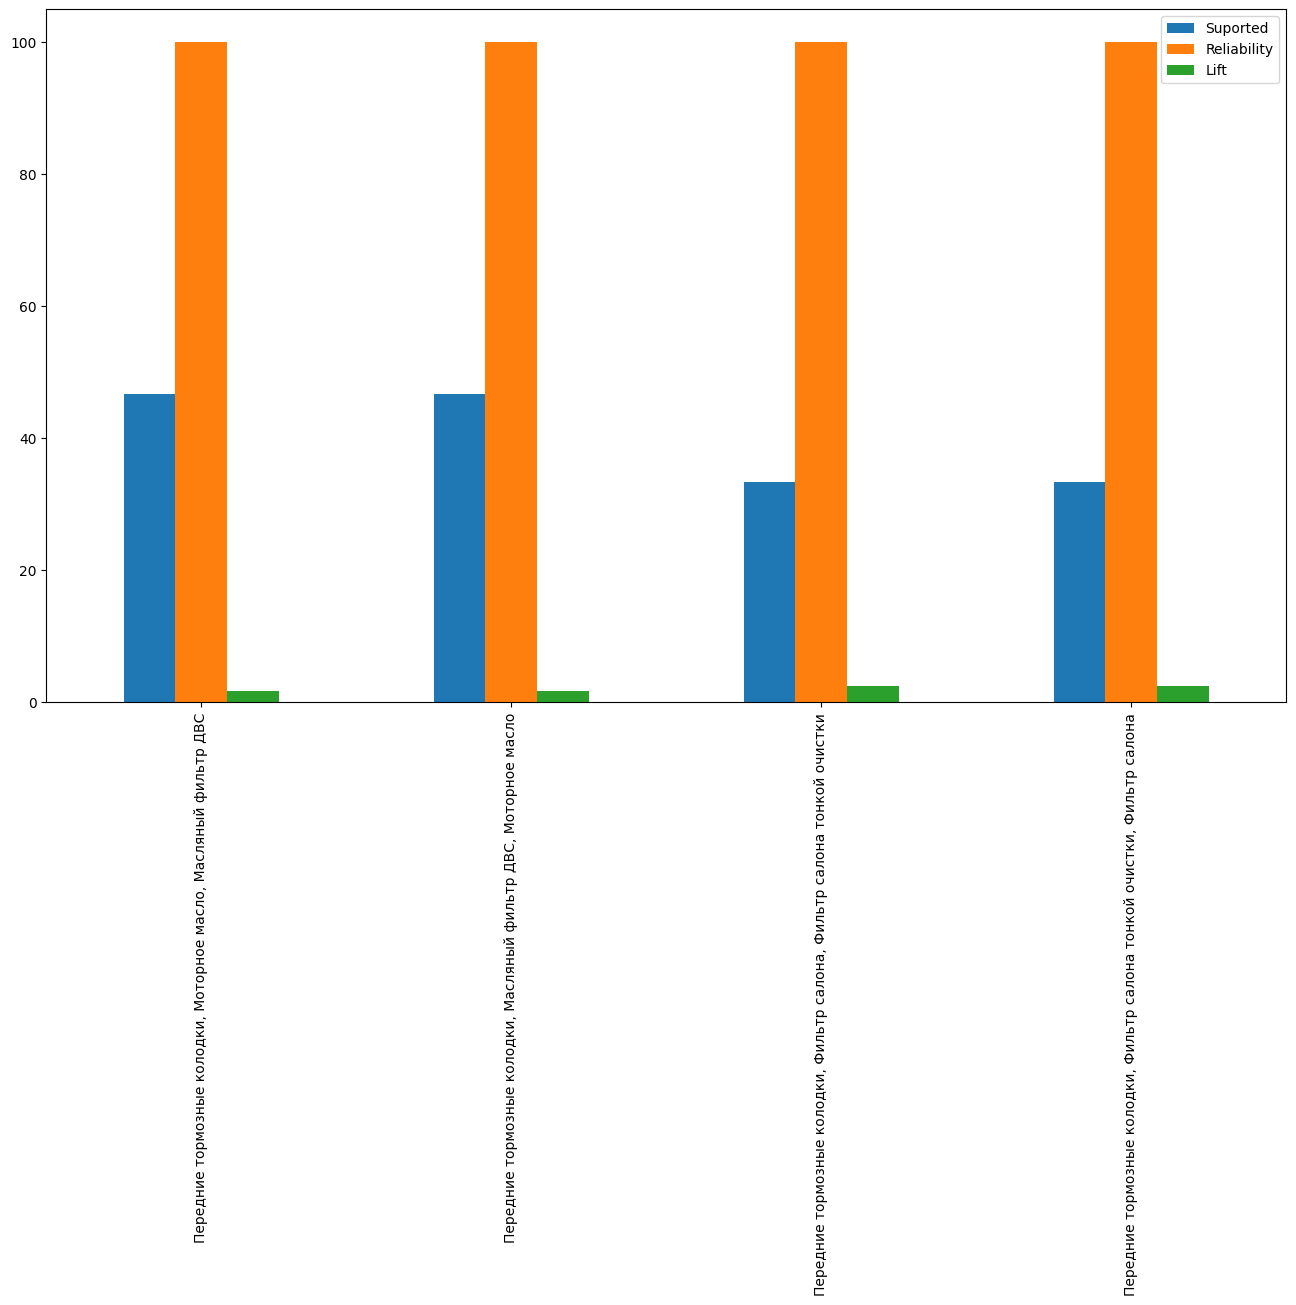

In [40]:
Dataframe_three.plot.bar(figsize=(16,9))

In [41]:
Dataframe_whis_four = []
for i in range(len(index_)):
    mass = []
    mass.append([index_[i][0], index_[i][1], index_[i][2]])
    mass.append(suported_mass_two_product[i][-1])
    mass.append(reliability_mass_two_product[i][-1])
    mass.append(lift_mass_two_product[i][-1])
    Dataframe_whis_three.append(mass)
Dataframe_whis_three = pd.DataFrame(Dataframe_whis_three, columns =['Name product', 'Suported', 'Reliability', 'Lift'],) 
Dataframe_whis_three = (Dataframe_whis_three.loc[Dataframe_whis_three.Suported < 89]) 
Dataframe_whis_three = (Dataframe_whis_three.loc[20 < Dataframe_whis_three.Suported]) 
Dataframe_whis_three = (Dataframe_whis_three.loc[30 < Dataframe_whis_three.Reliability]) 
Dataframe_whis_three = (Dataframe_whis_three.loc[Dataframe_whis_three.Reliability < 70])
Dataframe_whis_three = Dataframe_whis_three['Name product'].to_list()
Dataframe_whis_three

TypeError: '<' not supported between instances of 'str' and 'int'